## Name(s): Mehrdad Ghyabi
## NetID(s): mghyabi
## Team name on Kaggle leaderboard: Mehrdad Ghyabi

Kaggle Scores:

Perceptron: 0.334 |
SVM: 0.3595 |
Softmax: 0.325

In [581]:
import random
import numpy as np
from data_process import get_CIFAR10_data
from scipy.spatial import distance
from models import Perceptron, SVM, Softmax
from kaggle_submission import output_submission_csv
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading CIFAR-10

In the following cells we determine the number of images for each split and load the images.
<br /> 
TRAIN_IMAGES + VAL_IMAGES = (0, 50000]
, TEST_IMAGES = 10000

In [8]:
# You can change these numbers for experimentation
# For submission we will use the default values 
TRAIN_IMAGES = 40000
VAL_IMAGES = 10000

In [10]:
data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES)
X_train_CIFAR, y_train_CIFAR = data['X_train'], data['y_train']
X_val_CIFAR, y_val_CIFAR = data['X_val'], data['y_val']
X_test_CIFAR, y_test_CIFAR = data['X_test'], data['y_test']
n_class_CIFAR = len(np.unique(y_test_CIFAR))

Convert the sets of images from dimensions of **(N, 3, 32, 32) -> (N, 3072)** where N is the number of images so that each **3x32x32** image is represented by a single vector.

In [11]:
X_train_CIFAR = np.reshape(X_train_CIFAR, (X_train_CIFAR.shape[0], -1))
X_val_CIFAR = np.reshape(X_val_CIFAR, (X_val_CIFAR.shape[0], -1))
X_test_CIFAR = np.reshape(X_test_CIFAR, (X_test_CIFAR.shape[0], -1))

### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [12]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Perceptron

Perceptron has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according to the perceptron update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Perceptron classifier in the **models/perceptron.py**

The following code: 
- Creates an instance of the Perceptron classifier class 
- The train function of the Perceptron class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy


## Train Perceptron on CIFAR

In [489]:
lr = 0.3
n_epochs = 15

percept_CIFAR = Perceptron(n_class_CIFAR, lr, n_epochs)
percept_CIFAR.train(X_train_CIFAR, y_train_CIFAR)

In [490]:
pred_percept = percept_CIFAR.predict(X_train_CIFAR)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_CIFAR)))

The training accuracy is given by: 37.205000


### Validate Perceptron on CIFAR

In [491]:
pred_percept = percept_CIFAR.predict(X_val_CIFAR)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_CIFAR)))

The validation accuracy is given by: 33.400000


### Test Perceptron on CIFAR

In [492]:
pred_percept = percept_CIFAR.predict(X_test_CIFAR)
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_CIFAR)))

The testing accuracy is given by: 34.220000


### Perceptron_CIFAR Kaggle Submission

Once you are satisfied with your solution and test accuracy, output a file to submit your test set predictions to the Kaggle for Assignment 1 CIFAR. Use the following code to do so:

In [369]:
output_submission_csv('kaggle/perceptron_submission_CIFAR.csv', percept_CIFAR.predict(X_test_CIFAR))

### Hyperparameter Coarse Tuning



In [359]:
lr = np.array([0.1, 0.33, 1, 3.3])
n_epochs = np.array([10, 25, 50, 100])

acc_tr = np.zeros((len(lr),len(n_epochs)))
acc_val = np.zeros((len(lr),len(n_epochs)))

for i in np.arange(len(lr)): #grid search
    for j in np.arange(len(n_epochs)):
        
        percept_CIFAR = Perceptron(n_class_CIFAR, lr[i], n_epochs[j])
        percept_CIFAR.train(X_train_CIFAR, y_train_CIFAR)
        
        pred_percept = percept_CIFAR.predict(X_train_CIFAR)
        acc_tr[i, j] = get_acc(pred_percept, y_train_CIFAR)
        
        pred_percept = percept_CIFAR.predict(X_val_CIFAR)
        acc_val[i, j] = get_acc(pred_percept, y_val_CIFAR)

print(acc_tr)
print(acc_val)

[[37.8825 37.66   37.5775 37.8825]
 [38.52   38.06   37.6725 37.295 ]
 [37.75   36.9725 37.5875 37.81  ]
 [37.4425 37.645  37.9875 37.4925]]
[[34.74 34.64 34.38 34.35]
 [35.5  35.35 34.52 34.26]
 [34.98 33.95 34.13 35.09]
 [35.   35.01 34.73 34.71]]


### Hyperparameter Fine Tuning


In [360]:
lr = np.array([0.2, 0.3, 0.4, 0.9, 1.1, 1.2])
n_epochs = np.array([5, 10, 15, 100, 125, 150])

acc_tr = np.zeros((len(lr),len(n_epochs)))
acc_val = np.zeros((len(lr),len(n_epochs)))

for i in np.arange(len(lr)): #grid search
    for j in np.arange(len(n_epochs)):
        
        percept_CIFAR = Perceptron(n_class_CIFAR, lr[i], n_epochs[j])
        percept_CIFAR.train(X_train_CIFAR, y_train_CIFAR)
        
        pred_percept = percept_CIFAR.predict(X_train_CIFAR)
        acc_tr[i, j] = get_acc(pred_percept, y_train_CIFAR)
        
        pred_percept = percept_CIFAR.predict(X_val_CIFAR)
        acc_val[i, j] = get_acc(pred_percept, y_val_CIFAR)

print(acc_tr)
print(acc_val)

[[37.3025 38.0325 37.1725 37.47   37.3    37.8775]
 [37.8775 36.6475 38.6425 37.95   38.315  37.2025]
 [37.105  37.4625 38.07   37.6825 37.7525 38.13  ]
 [37.3    38.06   37.29   37.74   37.8825 37.125 ]
 [37.7375 37.2375 37.5625 37.75   37.625  37.6925]
 [38.515  37.43   37.2225 37.7075 37.705  36.8775]]
[[34.34 34.56 33.89 34.87 34.7  35.62]
 [34.66 33.82 35.77 34.63 35.61 34.15]
 [34.1  34.32 35.56 34.35 35.25 35.27]
 [34.35 35.68 34.36 34.52 34.79 34.72]
 [35.05 34.34 34.3  34.27 34.24 34.42]
 [35.99 34.84 34.26 34.95 35.23 33.91]]


# Support Vector Machines (with SGD)

Next, you will implement a "soft margin" SVM. In this formulation you will maximize the margin between positive and negative training examples and penalize margin violations using a hinge loss.

We will optimize the SVM loss using SGD. This means you must compute the loss function with respect to model weights. You will use this gradient to update the model weights.

SVM optimized with SGD has 3 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Epochs** - similar to as defined above in Perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case it is a coefficient on the term which maximizes the margin. You could try different values. The default value is set to 0.05.

You will implement the SVM using SGD in the **models/svm.py**

The following code: 
- Creates an instance of the SVM classifier class 
- The train function of the SVM class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train SVM on CIFAR

In [482]:
lr = 1.2
n_epochs = 20
reg_const = 0.33

svm_CIFAR = SVM(n_class_CIFAR, lr, n_epochs, reg_const)
svm_CIFAR.train(X_train_CIFAR, y_train_CIFAR)

In [483]:
pred_svm = svm_CIFAR.predict(X_train_CIFAR)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_CIFAR)))

The training accuracy is given by: 35.795000


### Validate SVM on CIFAR

In [468]:
pred_svm = svm_CIFAR.predict(X_val_CIFAR)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_CIFAR)))

The validation accuracy is given by: 34.650000


### Test SVM on CIFAR

In [469]:
pred_svm = svm_CIFAR.predict(X_test_CIFAR)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_CIFAR)))

The testing accuracy is given by: 35.450000


### SVM_CIFAR Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 CIFAR. Use the following code to do so:

In [470]:
output_submission_csv('kaggle/svm_submission_CIFAR.csv', svm_CIFAR.predict(X_test_CIFAR))

### Hyperparameter Coarse Tuning


In [464]:
lr = np.array([0.1, 0.33, 1])
n_epochs = np.array([5, 10, 20])
reg_const = np.array([0.01, 0.033, 0.1, 0.33])

svm_acc_val = np.zeros((len(lr),len(n_epochs),len(reg_const)))

for i in np.arange(len(lr)): #grid search
    for j in np.arange(len(n_epochs)):
        for k in np.arange(len(reg_const)):
        
            svm_CIFAR = SVM(n_class_CIFAR, lr[i], n_epochs[j], reg_const[k])
            svm_CIFAR.train(X_train_CIFAR, y_train_CIFAR)

            pred_svm = svm_CIFAR.predict(X_val_CIFAR)
            svm_acc_val[i, j, k] = get_acc(pred_svm, y_val_CIFAR)

print(svm_acc_val)

[[[22.13 21.5  22.01 21.63]
  [20.6  22.09 21.84 22.33]
  [22.53 22.06 21.88 22.07]]

 [[31.47 31.75 32.06 31.78]
  [31.34 31.35 31.25 31.57]
  [31.39 31.39 31.92 31.06]]

 [[35.45 34.43 35.44 34.72]
  [34.95 34.71 34.68 34.22]
  [34.91 34.88 34.5  35.17]]]


### Hyperparameter Fine Tuning


In [465]:
lr = np.array([0.75, 1, 1.2])
n_epochs = np.array([15, 20, 25])
reg_const = np.array([0.15, 0.33, 0.5])

svm_acc_val = np.zeros((len(lr),len(n_epochs),len(reg_const)))

for i in np.arange(len(lr)): #grid search
    for j in np.arange(len(n_epochs)):
        for k in np.arange(len(reg_const)):
        
            svm_CIFAR = SVM(n_class_CIFAR, lr[i], n_epochs[j], reg_const[k])
            svm_CIFAR.train(X_train_CIFAR, y_train_CIFAR)

            pred_svm = svm_CIFAR.predict(X_val_CIFAR)
            svm_acc_val[i, j, k] = get_acc(pred_svm, y_val_CIFAR)

print(svm_acc_val)

[[[34.32 34.2  34.39]
  [34.46 34.55 34.35]
  [34.72 34.19 34.59]]

 [[35.13 35.07 34.61]
  [35.22 35.01 35.09]
  [35.17 34.91 34.98]]

 [[34.99 35.34 35.32]
  [34.97 35.68 35.02]
  [34.88 34.42 35.35]]]


# Softmax Classifier (with SGD)

Next, you will train a Softmax classifier. This classifier consists of a linear function of the input data followed by a softmax function which outputs a vector of dimension C (number of classes) for each data point. Each entry of the softmax output vector corresponds to a confidence in one of the C classes, and like a probability distribution, the entries of the output vector sum to 1. We use a cross-entropy loss on this sotmax output to train the model. 

Check the following link as an additional resource on softmax classification: http://cs231n.github.io/linear-classify/#softmax

Once again we will train the classifier with SGD. This means you need to compute the gradients of the softmax cross-entropy loss function according to the weights and update the weights using this gradient. Check the following link to help with implementing the gradient updates: https://deepnotes.io/softmax-crossentropy

The softmax classifier has 3 hyperparameters that you can experiment with:
- **Learning rate** - As above, this controls how much the model weights are updated with respect to their gradient.
- **Number of Epochs** - As described for perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case, we minimize the L2 norm of the model weights as regularization, so the regularization constant is a coefficient on the L2 norm in the combined cross-entropy and regularization objective.

You will implement a softmax classifier using SGD in the **models/softmax.py**

The following code: 
- Creates an instance of the Softmax classifier class 
- The train function of the Softmax class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train Softmax on CIFAR

In [540]:
lr = 1.05
n_epochs = 8
reg_const = 0.35

softmax_CIFAR = Softmax(n_class_CIFAR, lr, n_epochs, reg_const)
softmax_CIFAR.train(X_train_CIFAR, y_train_CIFAR)

In [541]:
pred_softmax = softmax_CIFAR.predict(X_train_CIFAR)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_CIFAR)))

The training accuracy is given by: 33.302500


### Validate Softmax on CIFAR

In [542]:
pred_softmax = softmax_CIFAR.predict(X_val_CIFAR)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_CIFAR)))

The validation accuracy is given by: 32.350000


### Testing Softmax on CIFAR

In [543]:
pred_softmax = softmax_CIFAR.predict(X_test_CIFAR)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_CIFAR)))

The testing accuracy is given by: 32.010000


### Softmax_CIFAR Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 CIFAR. Use the following code to do so:

In [544]:
output_submission_csv('kaggle/softmax_submission_CIFAR.csv', softmax_CIFAR.predict(X_test_CIFAR))

### Hyperparameter Coarse Tuning


In [507]:
lr = np.array([0.1, 0.33, 1])
n_epochs = np.array([5, 10, 20])
reg_const = np.array([0.01, 0.033, 0.1, 0.33])

softmax_acc_val = np.zeros((len(lr),len(n_epochs),len(reg_const)))

for i in np.arange(len(lr)): #grid search
    for j in np.arange(len(n_epochs)):
        for k in np.arange(len(reg_const)):
        
            softmax_CIFAR = Softmax(n_class_CIFAR, lr[i], n_epochs[j], reg_const[k])
            softmax_CIFAR.train(X_train_CIFAR, y_train_CIFAR)

            pred_softmax = softmax_CIFAR.predict(X_val_CIFAR)
            softmax_acc_val[i, j, k] = get_acc(pred_softmax, y_val_CIFAR)

print(softmax_acc_val)

[[[19.52 20.56 20.11 18.92]
  [21.28 19.64 19.18 21.21]
  [19.36 19.79 20.01 19.76]]

 [[25.02 28.03 24.2  27.45]
  [28.67 27.66 25.62 27.65]
  [26.95 26.2  27.9  26.72]]

 [[28.9  31.35 30.97 32.36]
  [30.76 30.44 30.39 32.99]
  [31.39 29.99 32.72 27.87]]]


### Hyperparameter Fine Tuning


In [ ]:
lr = np.array([1, 1.05, 1.1])
n_epochs = np.array([8, 12, 15])
reg_const = np.array([0.25, 0.3, 0.35])

softmax_acc_val = np.zeros((len(lr),len(n_epochs),len(reg_const)))

for i in np.arange(len(lr)): #grid search
    for j in np.arange(len(n_epochs)):
        for k in np.arange(len(reg_const)):
        
            softmax_CIFAR = Softmax(n_class_CIFAR, lr[i], n_epochs[j], reg_const[k])
            softmax_CIFAR.train(X_train_CIFAR, y_train_CIFAR)

            pred_softmax = softmax_CIFAR.predict(X_val_CIFAR)
            softmax_acc_val[i, j, k] = get_acc(pred_softmax, y_val_CIFAR)

print(softmax_acc_val)

## Problem 2
### Part 1

selecting two classes and setting up training, validation, and test sets

In [694]:
c1 = 4
c2 = 7

X = np.vstack((X_train_CIFAR, X_val_CIFAR, X_test_CIFAR))
Y = np.hstack((y_train_CIFAR, y_val_CIFAR, y_test_CIFAR))

X = X[(Y==c1) + (Y==c2)]
Y = Y[(Y==c1) + (Y==c2)]

X_train = X[0:8000]
y_train = Y[0:8000]

X_val = X[8000:10000]
y_val = Y[8000:10000]

X_test = X[10000:]
y_test = Y[10000:]

#### Training the SVM

In [697]:
lr = 1.2
n_epochs = 20
reg_const = 0.33

svm_2 = SVM(n_class_CIFAR, lr, n_epochs, reg_const)
svm_2.train(X_train, y_train)

In [698]:
pred = svm_2.predict(X_train)
print('The training accuracy is given by: %f' % (get_acc(pred, y_train)))

The training accuracy is given by: 61.575000


In [699]:
pred = svm_2.predict(X_val)
print('The validation accuracy is given by: %f' % (get_acc(pred, y_val)))

The validation accuracy is given by: 57.950000


In [700]:
pred = svm_2.predict(X_test)
print('The testing accuracy is given by: %f' % (get_acc(pred, y_test)))

The testing accuracy is given by: 59.800000


##### The accuracy of using SVM to classify between only two classes is much higher than 10 classes, however, it can not be considered as linearly separable.

## Problem 2
### Part 2

#### Creating the dataset

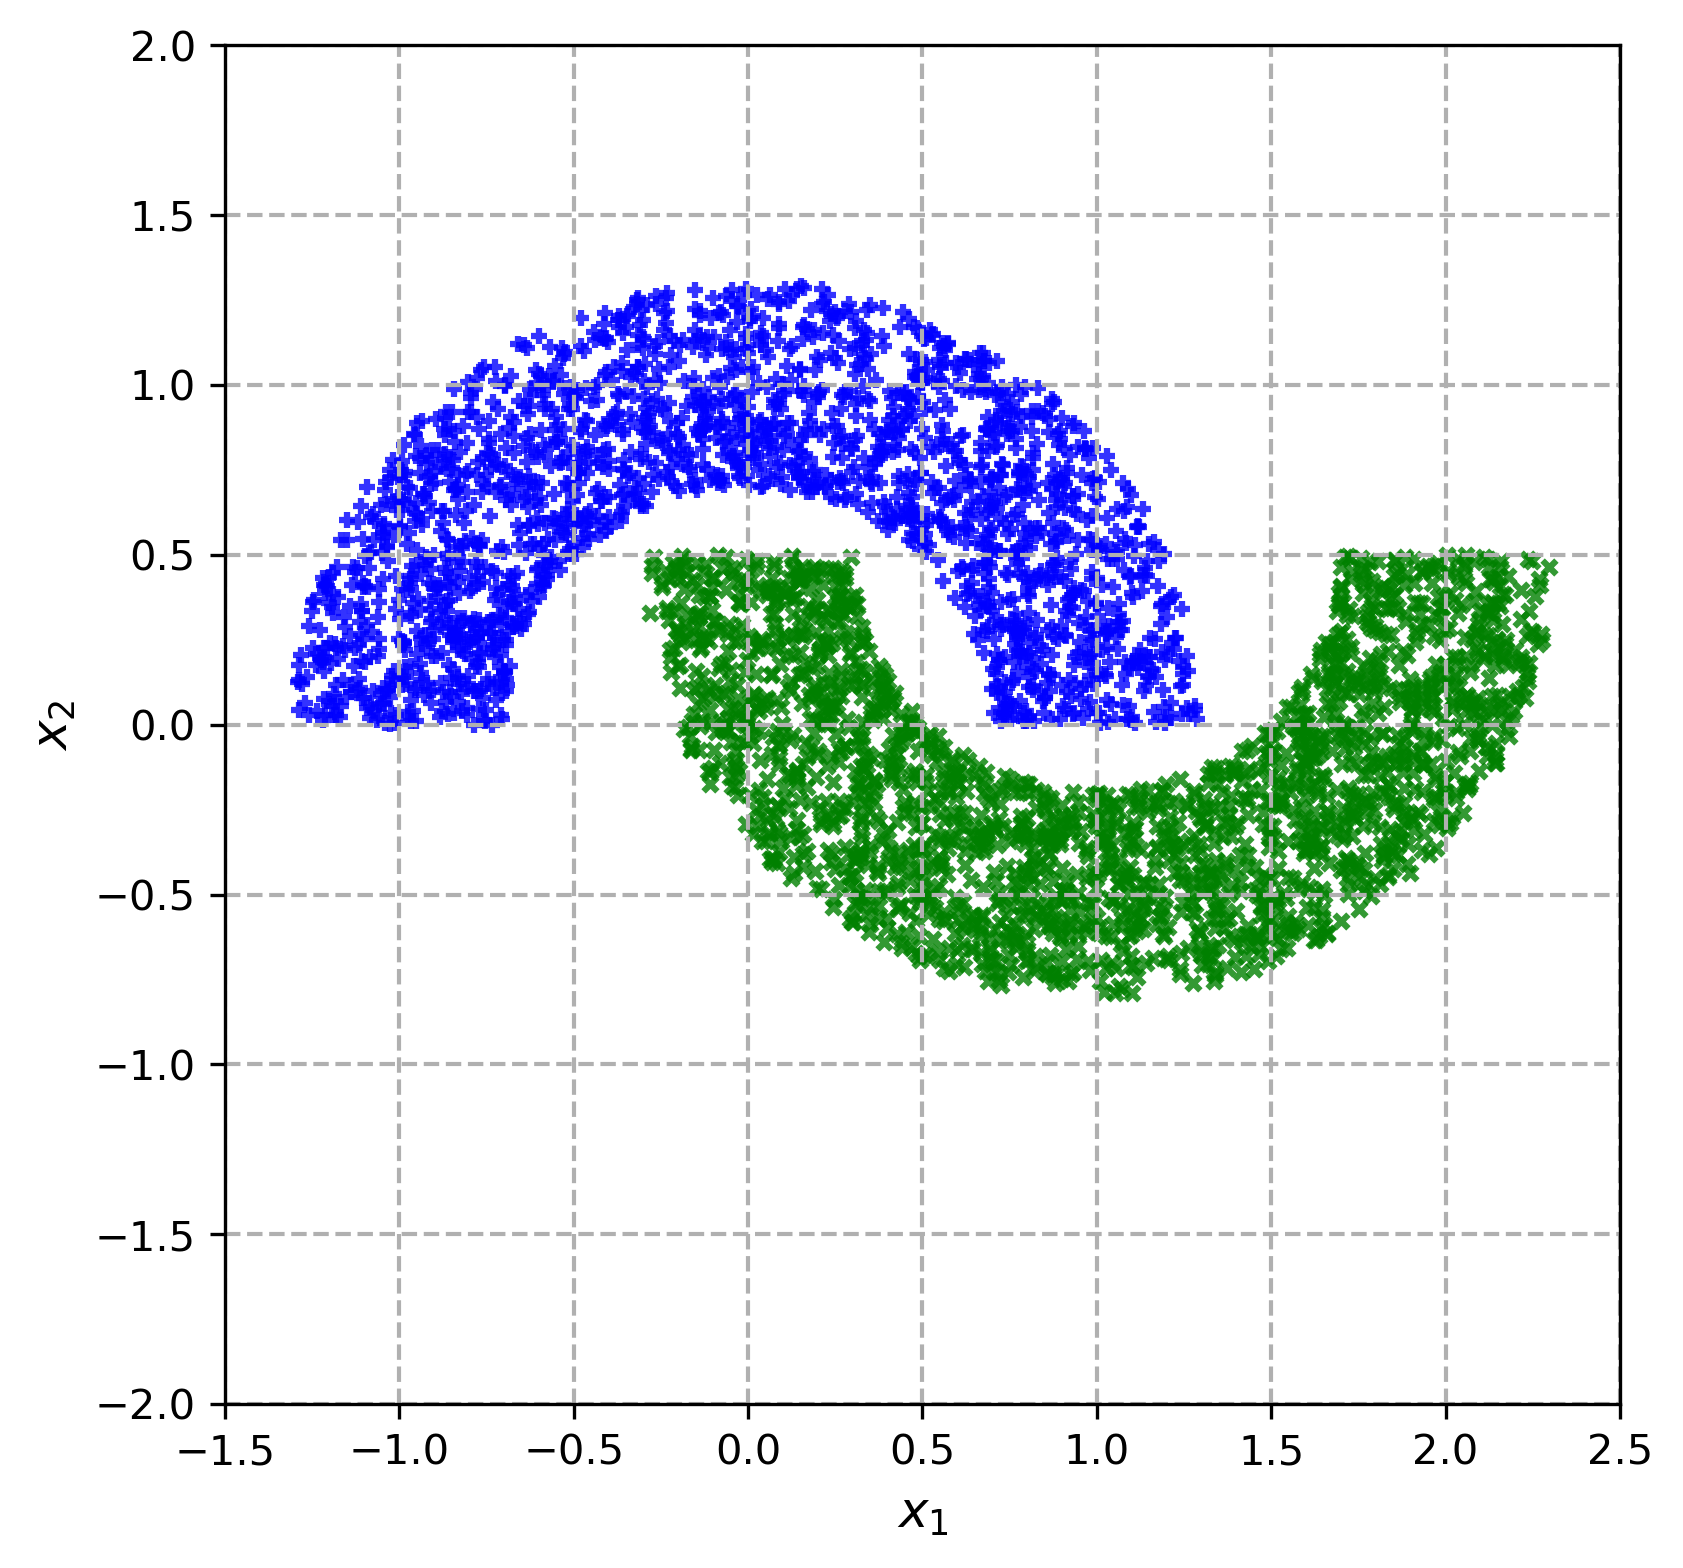

In [629]:
import matplotlib.pyplot as plt

def doublemoon(N,d,r,w):
    ro1=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t1=np.random.uniform(low=0,high=np.pi,size=N//2)
    x1=ro1*np.cos(t1)
    y1=ro1*np.sin(t1)
    l1=np.ones((1,N//2))
    
    ro2=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t2=np.random.uniform(low=np.pi,high=2*np.pi,size=N//2)
    x2=ro2*np.cos(t2)+r
    y2=ro2*np.sin(t2)-d
    l2=-1*np.ones((1,N//2))
    
    E1=np.vstack((x1,y1,l1))
    E2=np.vstack((x2,y2,l2))
    E=np.hstack((E1, E2))
    return E

N=4000
r=1
w=0.6
d=-0.5

E=doublemoon(N,d,r,w)

fig=plt.figure(figsize=[6,6],dpi=300)
plt.scatter(E[0, :1999], E[1, :1999], alpha=0.8,marker='+', c='b', edgecolors='none', s=15)
plt.scatter(E[0, 2000:], E[1, 2000:], alpha=0.8,marker='x', c='g', edgecolors='none', s=11)
plt.axis([-1.5,2.5,-2.0,2.0])
plt.grid('True',linestyle='--', linewidth=1)
plt.xlabel('$x_1$',fontsize=12)
plt.ylabel('$x_2$',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show(fig)

#### defining train set, validation set, and test set

In [638]:
X = E[0:2].T 
Y = E[2,:]

X -= np.min(X) #normalization
X /= np.max(X) #normalization
X = np.c_[X, np.ones((X.shape[0],1))] #bias

index = np.arange(X.shape[0])
np.random.shuffle(index)

X_train = X[index[0:3600]]
y_train = Y[index[0:3600]]

X_val = X[index[3600:3800]]
y_val = Y[index[3600:3800]]

X_test = X[index[3800:]]
y_test = Y[index[3800:]]


#### Training the SVM classifier

In [640]:
epochs = 20
alpha = 1.2
reg_const = 0.33

w = np.random.randn(2,2+1)

BatchSize = 20 #mini-batch
Nbatch = X_train.shape[0] // BatchSize #mini-batch

t = 1 #decay

for j in np.arange(epochs):

    index = np.arange(X_train.shape[0]) #SGD
    np.random.shuffle(index) #SGD

    index = np.reshape(index, (Nbatch, index.size//Nbatch)) #mini-batch

    for BatchIndex in index:

        dW = np.zeros(w.shape)

        for i in BatchIndex:

            x = X_train[i]
            y = y_train[i]

            f = np.dot(w,x)
            
            dW -= reg_const * alpha * w / X_train.shape[0]
            dW += np.tile(1*(f * y < 1), [2+1,1]).T * x *y
            
        dW /= BatchSize

        w += dW

    t += 1 #decay
    alpha *= 1/(50*t) #decay

#### Validation Accuracy

In [669]:
f = np.matmul(w,X_val.T)
pred = np.argmax(f,0)

pred[pred == 1] = -1
pred[pred == 0] = 1

acc_val = 100 * np.sum(y_val == pred)/len(pred)
print(acc_val)

48.0


#### Testing Accuracy

In [670]:
f = np.matmul(w,X_test.T)
pred = np.argmax(f,0)

pred[pred == 1] = -1
pred[pred == 0] = 1

acc_test = 100 * np.sum(y_test == pred)/len(pred)
print(acc_test)

53.5


Accuracy is not better than a coin toss!